In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] =15,9
rcParams['font.size'] = 15.0
from matplotlib import font_manager as fm
from sklearn.metrics import accuracy_score, mean_squared_error as mse
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn import metrics

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv') 

In [3]:
df['TotalCharges'].replace(" ",np.nan,inplace=True)

In [4]:
df.dropna(inplace=True)

In [5]:
df.drop(columns={'customerID'},axis=1,inplace=True)

In [6]:
df['TotalCharges']=df['TotalCharges'].astype('float')

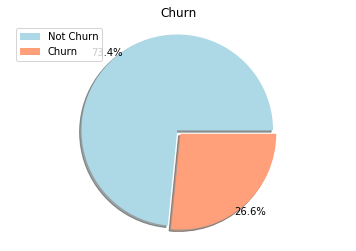

In [7]:
performance = [df[df['Churn'] == 'No']['Churn'].count(),\
               df[df['Churn'] == 'Yes']['Churn'].count()]

colors_list = ['#ADD8E6', '#FFA07A']
explode_list = [0.05, 0] 


plt.pie([float(v) for v in performance],autopct='%1.1f%%',pctdistance=1.09,
         colors=colors_list,shadow=True,explode=explode_list)


plt.title('Churn', y=1.0) 


plt.legend(labels=['Not Churn','Churn'], loc='upper left') 
plt.axis('equal') 
plt.show()

In [8]:
df['Churn']=df.Churn.apply(lambda x: 1 if x=='Yes' else 0)

In [9]:
df1 = pd.get_dummies(data = df,columns = ['gender',              
'Partner',             
'Dependents',          
'PhoneService',        
'MultipleLines',       
'InternetService',     
'OnlineSecurity',     
'OnlineBackup',        
'DeviceProtection',    
'TechSupport',         
'StreamingTV',         
'StreamingMovies',     
'Contract',            
'PaperlessBilling',
'PaymentMethod'],dtype=np.int32 )

In [10]:
df1['churn']= df1['Churn']
df1.drop(columns={'Churn'},inplace=True)

In [11]:
df1.drop(columns={'TotalCharges'},inplace=True)

In [12]:
# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
array = df1.values
X = array[:,0:44]
Y = array[:,44]
# feature extraction
model = LogisticRegression()
rfe = RFE(model, 20)
fit = rfe.fit(X, Y)
print(df1.columns.tolist())
print(fit.n_features_.tolist())
print(fit.support_)
print(fit.ranking_)
df9=pd.DataFrame(df1.columns.tolist())
df9[1]=pd.DataFrame(fit.support_.tolist())
df9.head(30)

/Users/neerajpadarthi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/neerajpadarthi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/neerajpadarthi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/neerajpadarthi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/neerajpadarthi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarn

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)

/Users/neerajpadarthi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/neerajpadarthi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/neerajpadarthi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/neerajpadarthi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/neerajpadarthi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarn

,0,1
0,SeniorCitizen,False
1,tenure,False
2,MonthlyCharges,False
3,gender_Female,False
4,gender_Male,False
5,Partner_No,False
6,Partner_Yes,True
7,Dependents_No,False
8,Dependents_Yes,False
9,PhoneService_No,False


In [13]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
array = df1.values
X = array[:,0:44]
Y = array[:,44]
test = SelectKBest(score_func=chi2, k=10)
fit = test.fit(X, Y)
# summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:7,:])

scores, pvalues = chi2(X, Y)
print(pvalues < 0.05 )
df9[2]=pd.DataFrame(pvalues < 0.05)

[1.335e+02 1.638e+04 3.653e+03 2.591e-01 2.543e-01 7.632e+01 8.186e+01
 5.586e+01 1.313e+02 8.682e-01 9.295e-02 3.889e+00 8.682e-01 6.515e+00
 7.114e+01 3.721e+02 2.855e+02 4.140e+02 2.855e+02 1.472e+02 2.825e+02
 2.855e+02 3.121e+01 2.502e+02 2.855e+02 2.022e+01 4.040e+02 2.855e+02
 1.354e+02 6.966e+01 2.855e+02 1.732e+01 7.286e+01 2.855e+02 1.593e+01
 5.167e+02 1.766e+02 4.862e+02 1.528e+02 1.050e+02 7.662e+01 9.997e+01
 4.241e+02 4.473e+01]
[[ 1.   29.85  0.    1.    1.    0.    0.    1.    0.    1.  ]
 [34.   56.95  0.    0.    1.    0.    0.    0.    0.    0.  ]
 [ 2.   53.85  0.    0.    1.    0.    0.    1.    0.    0.  ]
 [45.   42.3   0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 2.   70.7   1.    1.    1.    0.    0.    1.    0.    1.  ]
 [ 8.   99.65  1.    1.    1.    0.    0.    1.    0.    1.  ]
 [22.   89.1   1.    1.    1.    0.    0.    1.    0.    0.  ]]
[ True  True  True False False  True  True  True  True False False  True
 False  True  True  True  True  True 

In [14]:
df9.loc[(df9[2]==True)]

,0,1,2
0,SeniorCitizen,False,True
1,tenure,False,True
2,MonthlyCharges,False,True
5,Partner_No,False,True
6,Partner_Yes,True,True
7,Dependents_No,False,True
8,Dependents_Yes,False,True
11,MultipleLines_No,False,True
13,MultipleLines_Yes,False,True
14,InternetService_DSL,True,True


In [15]:
from sklearn.model_selection import train_test_split

new_data=df1.iloc[:,0:44][(df9.loc[(df9[2]==True)][0])]
x = (new_data-np.min(new_data))/(np.max(new_data)-np.min(new_data)).values


X_train, X_test, y_train, y_test = train_test_split(x,
                                                    df1.iloc[:,44], test_size=0.3,random_state=42)

In [16]:
# # Apply the SMOTE oversampling to the training data
# from imblearn.over_sampling import SMOTE
# sm = SMOTE(ratio='auto', kind='regular')
# X_train, y_train = sm.fit_sample(X_train, y_train)

The shape of the training set after the SMOTE oversampling = (4922, 39)


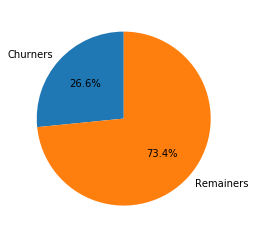

In [17]:
print('The shape of the training set after the SMOTE oversampling = ' + str(X_train.shape))
fig1, ax1 = plt.subplots()
ax1.pie([y_train[y_train==1].size, y_train[y_train==0].size], labels=['Churners', 'Remainers'],
        autopct='%1.1f%%', startangle=90)
plt.show()

79.48
[[1382  167]
 [ 266  295]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1549
           1       0.64      0.53      0.58       561

   micro avg       0.79      0.79      0.79      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.79      0.79      2110

0.7880344270544493


/Users/neerajpadarthi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


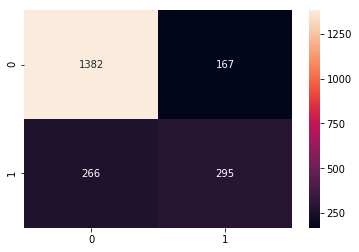

In [18]:
log_reg = LogisticRegression(C=0.200)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
acc_log_reg = log_reg.score(X_test, y_test)*100
print("{:.2f}".format(acc_log_reg))
# mse(y_test,y_pred)*100


lr_conf = confusion_matrix(y_test, y_pred)
print(lr_conf)
sns.heatmap(lr_conf, annot=True, fmt="d")
plt.show


print(classification_report( y_test, y_pred))

print(f1_score(y_test, y_pred, average='weighted')) 

/Users/neerajpadarthi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/neerajpadarthi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/neerajpadarthi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/neerajpadarthi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/neerajpadarthi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarn

/Users/neerajpadarthi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/neerajpadarthi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/neerajpadarthi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/neerajpadarthi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/neerajpadarthi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarn

/Users/neerajpadarthi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/neerajpadarthi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/neerajpadarthi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/neerajpadarthi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/neerajpadarthi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarn

1st max value of 0.533 occured at C=0.500


Text(0, 0.5, 'recall score')

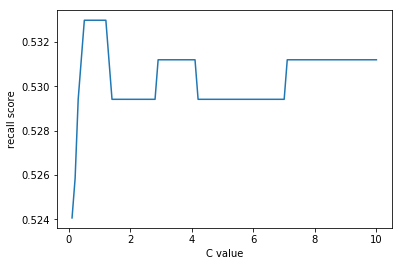

In [19]:
from sklearn.linear_model import LogisticRegressionCV


C_start = 0.1
C_end = 10
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val)
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline 
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

Accuracy: 0.7957
[[1383  166]
 [ 265  296]]

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1549
           1       0.64      0.53      0.58       561

   micro avg       0.80      0.80      0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110

[[1383  166]
 [ 265  296]]
0.789013482818632


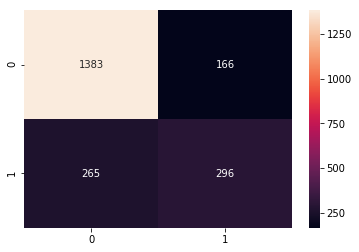

In [20]:
from sklearn.linear_model import LogisticRegressionCV
lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=False)  # set number of jobs to -1 which uses all cores to parallelize
lr_cv_model.fit(X_train, y_train.ravel())
lr_cv_predict_test = lr_cv_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))
print(metrics.confusion_matrix(y_test, lr_cv_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_cv_predict_test))
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

lr_conf = confusion_matrix(y_test, lr_cv_predict_test)
print(lr_conf)
sns.heatmap(lr_conf, annot=True, fmt="d")
plt.show
from sklearn.metrics import f1_score
print(f1_score(y_test, lr_cv_predict_test, average='weighted')) 

[2 1 0]


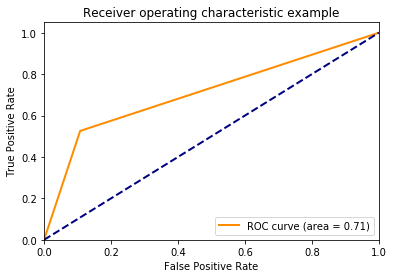

In [22]:
from sklearn.metrics import roc_auc_score,roc_curve,scorer,auc
fpr, tpr, thres = roc_curve(y_test, y_pred)
print(thres)
roc_auc = auc(fpr,tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

The shape of the training set after the SMOTE oversampling = (7228, 39)


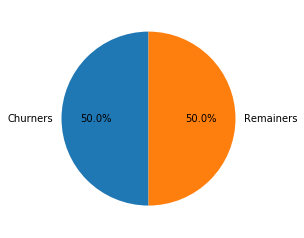

In [23]:
# Apply the SMOTE oversampling to the training data
from imblearn.over_sampling import SMOTE
sm = SMOTE(ratio='auto', kind='regular')
X_train, y_train = sm.fit_sample(X_train, y_train)
print('The shape of the training set after the SMOTE oversampling = ' + str(X_train.shape))
fig1, ax1 = plt.subplots()
ax1.pie([y_train[y_train==1].size, y_train[y_train==0].size], labels=['Churners', 'Remainers'],
        autopct='%1.1f%%', startangle=90)
plt.show()

Accuracy: 0.7488
[[1138  411]
 [ 119  442]]

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1549
           1       0.52      0.79      0.63       561

   micro avg       0.75      0.75      0.75      2110
   macro avg       0.71      0.76      0.72      2110
weighted avg       0.80      0.75      0.76      2110

[[1138  411]
 [ 119  442]]
0.7616813105114133


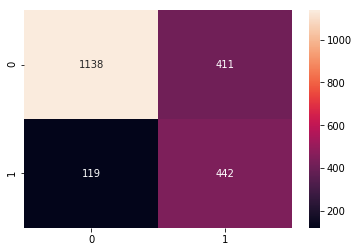

In [24]:
from sklearn.linear_model import LogisticRegressionCV
lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=False)  # set number of jobs to -1 which uses all cores to parallelize
lr_cv_model.fit(X_train, y_train.ravel())
lr_cv_predict_test = lr_cv_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))
print(metrics.confusion_matrix(y_test, lr_cv_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_cv_predict_test))
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

lr_conf = confusion_matrix(y_test, lr_cv_predict_test)
print(lr_conf)
sns.heatmap(lr_conf, annot=True, fmt="d")
plt.show
from sklearn.metrics import f1_score
print(f1_score(y_test, lr_cv_predict_test, average='weighted')) 

74.60
[[1131  418]
 [ 118  443]]
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1549
           1       0.51      0.79      0.62       561

   micro avg       0.75      0.75      0.75      2110
   macro avg       0.71      0.76      0.72      2110
weighted avg       0.80      0.75      0.76      2110

0.7591494188669198


/Users/neerajpadarthi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


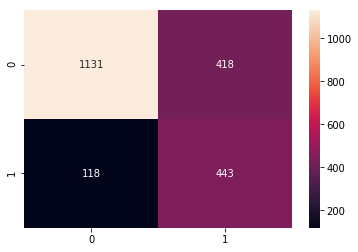

In [25]:
log_reg = LogisticRegression(C=0.200)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
acc_log_reg = log_reg.score(X_test, y_test)*100
print("{:.2f}".format(acc_log_reg))
# mse(y_test,y_pred)*100


lr_conf = confusion_matrix(y_test, y_pred)
print(lr_conf)
sns.heatmap(lr_conf, annot=True, fmt="d")
plt.show


print(classification_report( y_test, y_pred))

print(f1_score(y_test, y_pred, average='weighted')) 